In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train , y_train) , (X_test , y_test) = keras.datasets.mnist.load_data()

In [3]:
len(X_train),len(X_test) ,X_train[0].shape

(60000, 10000, (28, 28))

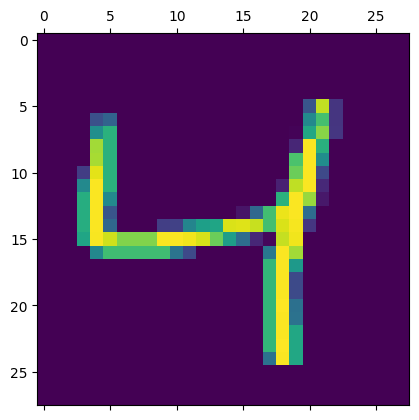

In [4]:
plt.matshow(X_train[2])

In [5]:
y_train[:10] , X_train[0]

(array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8),
 array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136,

> **Remark:** Flattening is the process of turning multi-dimensional data into a 1D array (a single long vector).

# We need to scale our data
### it means changing the range of our numbers so they are easier for the model to learn from

In [6]:
X_train=X_train / 255
X_test=X_test / 255
X_train[0] , X_test[0]

(array([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [7]:
# Check original training data shape
X_train.shape  # Output: (60000, 28, 28)
# Flatten the 28x28 images into 784-dimensional vectors
X_train_flattened = X_train.reshape(len(X_train), 28 * 28)
X_test_flattened = X_test.reshape(len(X_test), 28 * 28)

# Verify the flattened test data shape
X_test_flattened.shape  # Output: (10000, 784)

(10000, 784)

In [8]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

**Dense:** mean all the neurons in one layer are connected to all the neurons in the second layer

In [9]:
model = keras.Sequential([
    #Defining input(784 neurons) and output(10neurons) layers : 
    keras.Input(shape=(784,)),
    keras.layers.Dense(10, activation='sigmoid')
])
model.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy' , #because our output is categorical(have categories 0 to 9)
             metrics=['accuracy']
)
model.fit(X_train_flattened , y_train ,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8773 - loss: 0.4713
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 996us/step - accuracy: 0.9144 - loss: 0.3041
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9210 - loss: 0.2831
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9232 - loss: 0.2729
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9255 - loss: 0.2663


What is an **epoch**?

Epoch = 1 full pass through all the training data.

So, epochs=5 means:

The model will go through all 60,000 images 5 times.

Why do we need multiple epochs?

Neural networks learn gradually.

One pass is usually not enough for good accuracy.

Multiple epochs allow the model to fine-tune its weights.

But too many epochs can cause **overfitting** (the model memorizes the training data and performs poorly on unseen data).

In [10]:
 model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9252 - loss: 0.2693


[0.2693012058734894, 0.9251999855041504]

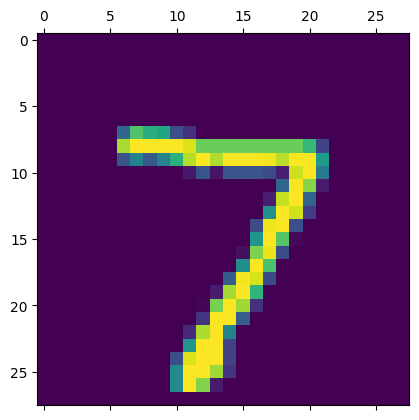

In [11]:
plt.matshow(X_test[0])

In [12]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 580us/step


array([1.5412500e-02, 4.0903018e-07, 5.2549165e-02, 9.2493534e-01,
       1.4237246e-03, 1.3766454e-01, 1.5049895e-06, 9.9976027e-01,
       7.9001807e-02, 6.0062099e-01], dtype=float32)

### We can see here that the maximum percent is 0.999 whitch correspond to value 7 => True prediction

In [13]:
np.argmax(y_predicted[0]).item()

7

In [14]:
y_predicted_labels = [np.argmax(y_predicted[i]).item() for i in range(len(y_predicted))]
y_predicted_labels[:10],y_test[:10]

([7, 2, 1, 0, 4, 1, 4, 9, 6, 9],
 array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8))

In [15]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 955,    0,    1,    2,    0,    8,    7,    3,    4,    0],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   4,    9,  927,   12,    7,    7,   13,   11,   38,    4],
       [   4,    0,   20,  891,    0,   53,    2,   14,   20,    6],
       [   1,    1,    4,    2,  912,    0,   13,    6,   10,   33],
       [   7,    3,    3,   15,    6,  808,   14,    4,   26,    6],
       [  10,    3,    5,    1,    6,   17,  911,    2,    3,    0],
       [   1,    6,   23,    4,    3,    0,    0,  967,    1,   23],
       [   5,    7,    7,   18,    9,   38,    9,   11,  865,    5],
       [  10,    7,    1,    9,   28,   11,    0,   32,    6,  905]],
      dtype=int32)>

# To better visualize confusion matrix and what is exactly : 

Text(95.72222222222221, 0.5, 'Truth')

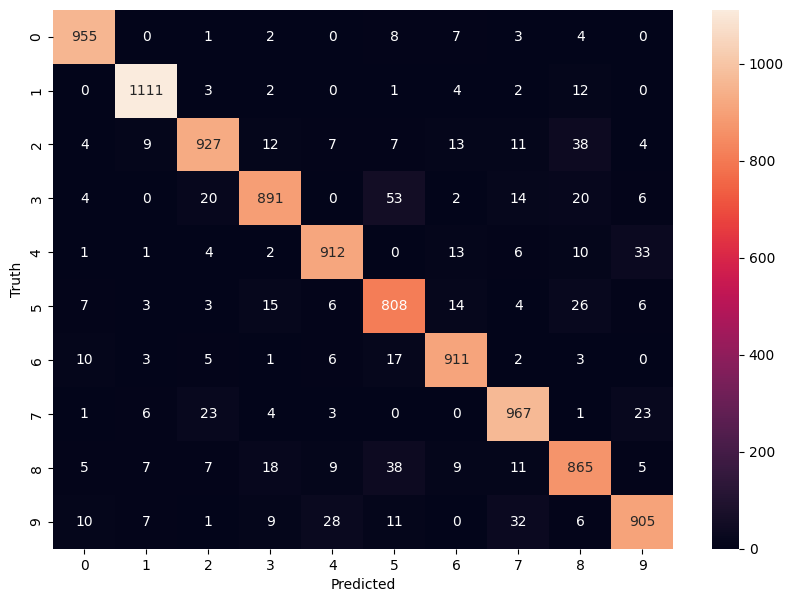

In [16]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### We can see here that all numbers not in the diagonal are errors of our models , and the numbers in diagonal tell us the number of predicted y that are true
##### for example our model predict 5 , 39 times when the true value is 8

# Now we will add a hidden layer :

In [17]:
model1 = keras.Sequential([
    #Defining input(784 neurons) and output(10neurons) layers : 
    keras.Input(shape=(784,)),
    keras.layers.Dense(100, activation='relu'),#RElU is another activation function,don't worry !
    keras.layers.Dense(10, activation='sigmoid')
])
model1.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy' , #because our output is categorical(have categories 0 to 9)
             metrics=['accuracy']
)
model1.fit(X_train_flattened , y_train ,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9238 - loss: 0.2706
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9645 - loss: 0.1218
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9749 - loss: 0.0853
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9801 - loss: 0.0645
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9839 - loss: 0.0517


In [18]:
model1.evaluate(X_test_flattened,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9756 - loss: 0.0840


[0.08404023945331573, 0.975600004196167]

##### we can see here that the accuracy is better(because it is biggier) than the 

###### preivous accurancy (see above and you will find 0.925000011920929) . So this is because 

###### we add a hidden layer ==> the hidden layer improve the accuracy of the model

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step


Text(95.72222222222221, 0.5, 'Truth')

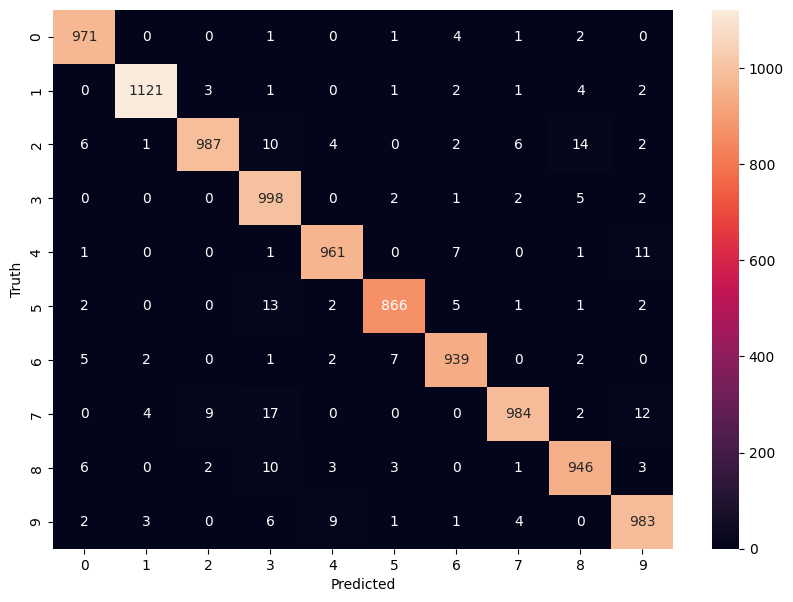

In [20]:
y_predicted = model1.predict(X_test_flattened)
y_predicted_labels = [np.argmax(y_predicted[i]).item() for i in range(len(y_predicted))]
y_predicted_labels[:10],y_test[:10]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot=True , fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### We can see here that the number of true predictions is bigger than the previous model and the number of errors has decreased (see diagonal numbers and compare it with the previous) , this is explained by the augmentation of the accuracy which is explained by adding a hidden layer 😊 

# Now let's see a method that allows us not to create a flattend array( that's mean we don't have to create X_train_flattened)

In [ ]:
model2 = keras.Sequential([
    #Defining input(784 neurons) and output(10neurons) layers : 
    keras.layers.Flatten(input_shape=(28,28,)),#here is the change ! we use .Flatten !
    keras.layers.Dense(100, activation='relu'),#RElU is another activation function,don't worry !
    keras.layers.Dense(10, activation='sigmoid')
])
model2.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy' , #because our output is categorical(have categories 0 to 9)
             metrics=['accuracy']
)
model2.fit(X_train_flattened , y_train ,epochs=5)